In [1]:
# Data
# here for the original data to download: https://www.openicpsr.org/openicpsr/project/116312/version/V1/view
# here from my google drive account: https://drive.google.com/drive/folders/1dELVb_yLcrmOlyaTYyE2SP9yR1wZA-9r?usp=sharing
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
from numpy import exp
from scipy.special import factorial
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from statsmodels.api import Poisson
from scipy import stats
from scipy.stats import norm
from statsmodels.iolib.summary2 import summary_col
# Loading from google drive(see above)
url = 'https://drive.google.com/file/d/1LyEkr27AM0Pnilg6Bp3akKXUyP3zw5e9/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_stata(url)
#df = pd.read_stata('/Users/michalurdanivia/Library/CloudStorage/GoogleDrive-mw.urdanivia@gmail.com/Mon Drive/Syllabus/Statistiques_UGA_M1Eco_S1/Autres/Donnees/116312-V1/P2016_1068_data/fp.dta')
df.head()

,country,ccode,year,cyear,numbil,numbil0,numbilall,netw,netw0,netwall,...,gattwto08,mcapbdol,mcapbdol08,lnmcap08,topintaxnew,topint08,rintr,noyrs,roflaw,nrrents
0,United States,2.0,1990.0,21990.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,3060.000000,11737.599609,9.370638,39.799999,39.799999,4.988405,20.0,1.61,NaN
1,United States,2.0,1991.0,21991.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4090.000000,11737.599609,9.370638,39.799999,39.799999,4.988405,20.0,1.61,NaN
2,United States,2.0,1992.0,21992.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4490.000000,11737.599609,9.370638,39.799999,39.799999,4.988405,20.0,1.61,NaN
3,United States,2.0,1993.0,21993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,5136.198730,11737.599609,9.370638,39.799999,39.799999,4.988405,20.0,1.61,NaN
4,United States,2.0,1994.0,21994.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,5067.016113,11737.599609,9.370638,39.799999,39.799999,4.988405,20.0,1.61,NaN


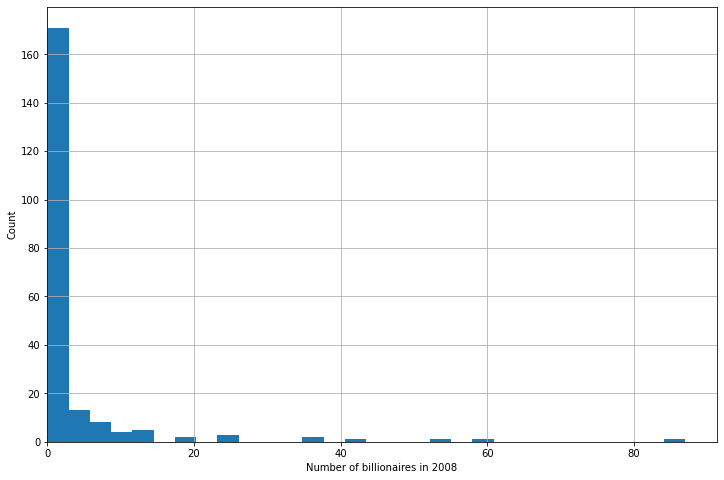

In [2]:
numbil0_2008 = df[(df['year'] == 2008) & (
    df['country'] != 'United States')].loc[:, 'numbil0']

plt.subplots(figsize=(12, 8))
plt.hist(numbil0_2008, bins=30)
plt.xlim(left=0)
plt.grid()
plt.xlabel('Number of billionaires in 2008')
plt.ylabel('Count')
plt.show()

In [3]:
# Keep only year 2008
df = df[df['year'] == 2008]

# Add a constant
df['const'] = 1

# Variable sets
reg1 = ['const', 'lngdppc', 'lnpop', 'gattwto08']
reg2 = ['const', 'lngdppc', 'lnpop',
        'gattwto08', 'lnmcap08', 'rintr', 'topint08']
reg3 = ['const', 'lngdppc', 'lnpop', 'gattwto08', 'lnmcap08',
        'rintr', 'topint08', 'nrrents', 'roflaw']

In [6]:
# Linear regressions
model = sm.OLS(df[['numbil0']], df[reg1], missing='drop')
results = model.fit(cov_type='HC0')
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                numbil0   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     1.649
Date:                Wed, 26 Oct 2022   Prob (F-statistic):              0.179
Time:                        10:51:54   Log-Likelihood:                -965.99
No. Observations:                 197   AIC:                             1940.
Df Residuals:                     193   BIC:                             1953.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -103.3118     53.183     -1.943      0.0

In [4]:
# Poisson regression
regs = [reg1, reg2, reg3]
reg_names = ['Model 1', 'Model 2', 'Model 3']
info_dict = {'Pseudo R-squared': lambda x: f"{x.prsquared:.2f}",
             'No. observations': lambda x: f"{int(x.nobs):d}"}
regressor_order = ['const',
                   'lngdppc',
                   'lnpop',
                   'gattwto08',
                   'lnmcap08',
                   'rintr',
                   'topint08',
                   'nrrents',
                   'roflaw']
results = []

for reg in regs:
    result = sm.Poisson(df[['numbil0']], df[reg],
                        missing='drop').fit(cov_type='HC0',
                                            maxiter=100, disp=0)
    results.append(result)

results_table = summary_col(results=results,
                            float_format='%0.3f',
                            stars=True,
                            model_names=reg_names,
                            info_dict=info_dict,
                            regressor_order=regressor_order)
results_table.add_title('Table 1 - Explaining the Number of Billionaires \
                        in 2008')
print(results_table)

Table 1 - Explaining the Number of Billionaires                         in 2008
                  Model 1    Model 2    Model 3  
-------------------------------------------------
const            -29.050*** -19.444*** -20.858***
                 (2.578)    (4.820)    (4.255)   
lngdppc          1.084***   0.717***   0.737***  
                 (0.138)    (0.244)    (0.233)   
lnpop            1.171***   0.806***   0.929***  
                 (0.097)    (0.213)    (0.195)   
gattwto08        0.006      0.007      0.004     
                 (0.007)    (0.006)    (0.006)   
lnmcap08                    0.399**    0.286*    
                            (0.172)    (0.167)   
rintr                       -0.010     -0.009    
                            (0.010)    (0.010)   
topint08                    -0.051***  -0.058*** 
                            (0.011)    (0.012)   
nrrents                                -0.005    
                                       (0.010)   
roflaw              